# 🎓 Jamboree Graduate Admission Prediction

## 1. 📌 Introduction

### 🎯 Project Goal/Objective

This project aims to help **Jamboree** provide students with personalized graduate admission predictions via their website. The core objectives are:

- To understand how academic performance, test scores, and research experience affect the chances of getting into top universities.
- To build an **interpretable** and **deployable** machine learning model that aids both students and educational consultants.

---

### 🏢 Business Context

This case study is inspired by a real-world use case from **Jamboree**, a renowned educational institution that prepares students for exams like **GMAT, GRE, and SAT**.

Jamboree is expanding its services by offering a **data-driven admission predictor tool**. Insights from this analysis can help:

- Prioritize which student profiles need stronger support in specific areas (e.g., **SOP**, **LOR**).
- Build trust and transparency into how admission chances are assessed.

---

### 📦 Key Deliverables

- ✅ An analysis of key factors influencing graduate admission chances  
- ✅ A predictive model using **Linear Regression** to estimate admission probability  
- ✅ An interpretable and deployable machine learning solution



## 2. 📊 Data

### 📁 Data Source

The primary dataset used in this project is a CSV file named **`Jamboree_Admission.csv`**, which was downloaded from a **Google Drive link**.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!gdown --output "D:\Projects\ML Projects\Graduate-admission-prediction\artifacts\Jamboree_Admission.csv" 1SzWC_6OwG2ETx6pAyngHHshZB-pN4wEv

Downloading...
From: https://drive.google.com/uc?id=1SzWC_6OwG2ETx6pAyngHHshZB-pN4wEv
To: D:\Projects\ML Projects\Graduate-admission-prediction\artifacts\Jamboree_Admission.csv

  0%|          | 0.00/16.2k [00:00<?, ?B/s]
100%|██████████| 16.2k/16.2k [00:00<?, ?B/s]


In [7]:
#Loading the data set
df = pd.read_csv(r'D:\Projects\ML Projects\Graduate-admission-prediction\artifacts\Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### 🧾 Data Description

The dataset consists of **500 student profiles**, with each row representing one applicant.

It includes features related to:

- **Academic scores** (GRE, TOEFL, CGPA)
- **Profile strength** (University Rating, SOP, LOR)
- **Research experience** (binary indicator)

The **target variable** is `Chance of Admit`, a float value between 0 and 1 representing the likelihood of admission.

---

| **Feature**         | **Description**                                                       |
|---------------------|-----------------------------------------------------------------------|
| **GRE Score**        | GRE exam score (Range: 0–340)                                         |
| **TOEFL Score**      | TOEFL exam score (Range: 0–120)                                       |
| **University Rating**| Reputation score of the university (1 = lowest, 5 = highest)         |
| **SOP**              | Strength of Statement of Purpose (Scale: 1–5)                         |
| **LOR**              | Strength of Letter of Recommendation (Scale: 1–5)                     |
| **CGPA**             | Undergraduate GPA (Scale: 0–10)                                       |
| **Research**         | Whether the applicant has research experience (1 = Yes, 0 = No)       |
| **Chance of Admit**  | 🎯 Target variable – predicted admission probability (Range: 0–1)     |

In [8]:
#Shape of the data set.
df.shape

(500, 9)

### 📐 Data Volume

The dataset comprises:

- **500 entries (rows)** – each representing a unique student applicant  
- **9 columns (features)** – including both input variables and the target variable

This volume is manageable for exploratory analysis and model training, while still being large enough to extract meaningful patterns and insights.


In [9]:
#Info about the Columns like null values, data type, and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### 🔍 Data Granularity

Each row in the dataset corresponds to a **unique graduate school applicant**.  
This row-level granularity is appropriate for modeling individual admission chances and ensures that each observation represents one decision case.

---

### 🧹 Data Quality Check

An initial data quality check using `df.info()` shows that:

- ✅ **No missing values** were found in the dataset  
- ✅ All **columns have 500 non-null entries**, confirming data completeness

This clean structure ensures we can proceed without needing to handle null values or imputation.

## 3. 🧠 Methodology

### 🧩 Problem Formulation

This project addresses a **supervised regression problem**.  
The goal is to **predict a continuous target variable**, `Chance_of_Admit`, based on various student profile features such as test scores, GPA, and research experience.

By modeling the relationship between these features and admission outcomes, we can estimate the likelihood of a student's acceptance into graduate programs.


### 🧼 Data Preprocessing / Cleaning

#### 🔤 Column Renaming

In [10]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
df.rename(columns={'GRE Score': 'GRE_Score', 'TOEFL Score': 'TOEFL_Score', 'University Rating': 'University_Rating', 'LOR ': 'LOR', 'Chance of Admit ':'Chance_of_Admit'}, inplace=True)
df.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


To ensure **naming consistency** and avoid issues when referencing columns in code:

- All column names with **spaces** or **trailing spaces** were renamed using **underscores** (`_`)
- This makes the dataset easier to work with programmatically and aligns with Python naming conventions

> ✅ Example: `"TOEFL Score"` → `"TOEFL_Score"`

#### 🗃️ Dropping Irrelevant Columns

In [12]:
#Going forward the column 'Serial No.' is not of use as it is the unique row identifier for each applicant in the dataset.

df.drop(labels='Serial No.', axis=1, inplace=True)
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65




The column **`Serial No.`** was identified as a unique row identifier used solely for indexing applicants.  
Since it does **not contribute any predictive information**, it was deemed irrelevant for modeling and was **dropped** from the dataset.

> ✅ This helps streamline the feature set and avoid unnecessary noise in the model.

#### 🚫 Handling Missing Values

In [13]:
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

An initial inspection using `df.info()` and `df.isnull().sum()` confirmed that:

- ✅ **No missing values** are present in the dataset
- ✅ All columns contain **500 non-null entries**

This means the dataset is already clean in terms of null values, allowing us to proceed directly to analysis and modeling without the need for imputation or filtering.


#### 🧾 Handling Duplicate Rows

In [14]:
#Check of duplicate rows
df.duplicated().sum()

0

To ensure data integrity, we performed a check for duplicate rows using `df.duplicated().sum()`.

- ✅ **No duplicate entries** were found in the dataset

This confirms that each row represents a unique applicant profile, and no additional cleaning is required in this regard.


#### 📊 Outlier Detection

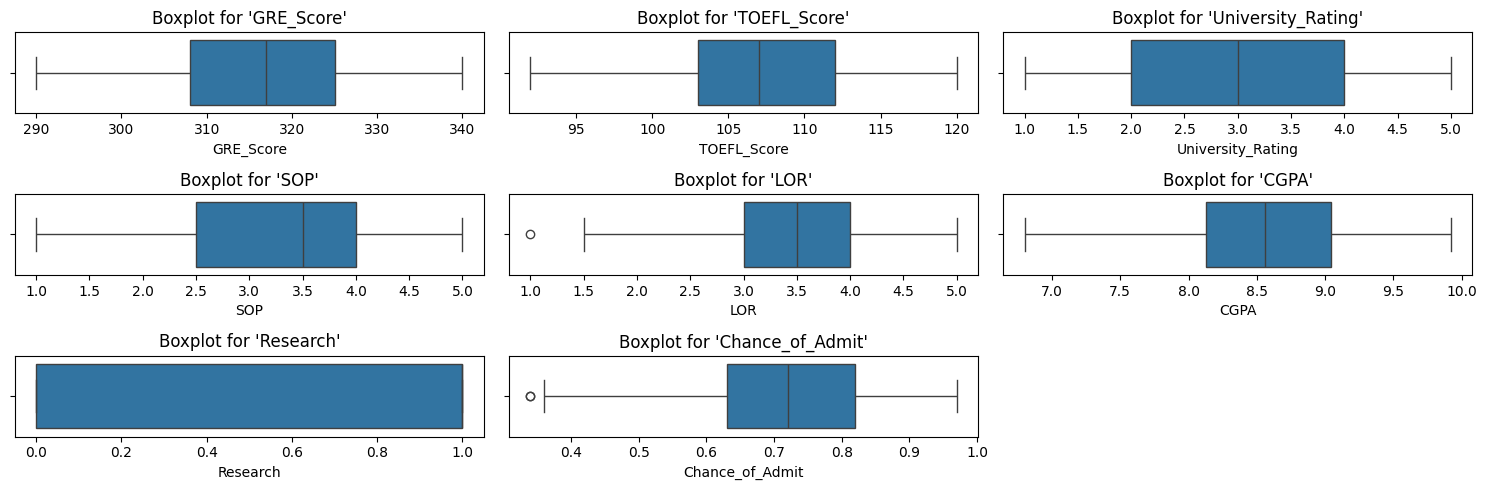

In [15]:
plt.figure(figsize=(15,5))
for i,col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for '{col}'")
plt.tight_layout()
plt.show()

To identify potential outliers in the dataset:

- **Box plots** were used to visually inspect the distribution of each feature.
- The **Interquartile Range (IQR) method** was applied to numerically detect outliers, focusing on the columns:
  - `LOR` (Letter of Recommendation strength)
  - `Chance_of_Admit` (target variable)

This process helps ensure the quality of the data by highlighting extreme values that may affect model performance or require further investigation.


- **Outliers in 'LOR' column:**

In [16]:
# check for outliers in LOR column

q1 = df['LOR'].quantile(.25)
q3 = df['LOR'].quantile(.75)
IQR = q3-q1
df[~((df['LOR'] >= q1 - 1.5*IQR) & (df['LOR'] <= q3 + 1.5*IQR))]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


One outlier was identified in the LOR column, with a value of 1.0.

- **Outliers in 'Chance_of_Admit' column:**

In [17]:
# check for outliers in Chance_of_Admit column

q1 = df['Chance_of_Admit'].quantile(.25)
q3 = df['Chance_of_Admit'].quantile(.75)
IQR = q3-q1
df[~((df['Chance_of_Admit'] >= q1 - 1.5*IQR) & (df['Chance_of_Admit'] <= q3 + 1.5*IQR))]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


Two outliers were identified in the Chance_of_Admit column, both with a value of 0.34.

*Note: The decision on how to handle these outliers (e.g., removal, transformation, or keeping them) will depend on further analysis and domain knowledge. For this project, they are noted but not explicitly removed at this stage.*

## 4. 🔎 Exploratory Data Analysis (EDA)

### 📈 Descriptive Statistics

A summary of descriptive statistics was generated for each column to gain insights into:

- The **distribution** of values  
- Measures of **central tendency** (mean, median)  
- Measures of **spread** (standard deviation, min, max, quartiles)


In [18]:
#Descriptive statistics of each coulmn of the data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE_Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL_Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University_Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


### 📊 Feature-wise Summary Statistics

- **GRE Score:** Ranges from **290** to **340**, with a mean of approximately **316**.  
- **TOEFL Score:** Ranges from **92** to **120**, with a mean around **107**.  
- **University Rating, SOP, LOR:**  
  - These are categorical/ordinal features ranging from **1** to **5**.  
  - Their means are approximately **3.1**, **3.4**, and **3.5**, respectively, indicating a good spread across different rating levels.  
- **CGPA:** Ranges from **6.8** to **9.92**, with a mean near **8.58**.  
- **Research:** A binary variable (0 or 1), with **56%** of applicants having research experience (mean = **0.56**).  
- **Chance of Admit:** The target variable ranges from **0.34** to **0.97**, with a mean of about **0.72**.

### 🔢 Unique Values Count

Analyzing the number of unique values per feature helps us understand the **cardinality** and whether a feature is categorical, ordinal, or continuous.

In [19]:
def unique_values_counts(data):
    for _ in data.columns:
        if data[_].nunique() < 6:
            print(f"'{_}' unique values : {data[_].unique()}")
            print(f"'{_}' count of unique values : {data[_].nunique()}\n")
        else:
            print(f"'{_}' count of unique values : {data[_].nunique()}\n")

In [20]:
unique_values_counts(df)

'GRE_Score' count of unique values : 49

'TOEFL_Score' count of unique values : 29

'University_Rating' unique values : [4 3 2 5 1]
'University_Rating' count of unique values : 5

'SOP' count of unique values : 9

'LOR' count of unique values : 9

'CGPA' count of unique values : 184

'Research' unique values : [1 0]
'Research' count of unique values : 2

'Chance_of_Admit' count of unique values : 61



Based on the unique values analysis:

- **University_Rating** and **Research** are clearly **categorical** features, with **5** and **2** unique values respectively.  
- The features **GRE_Score**, **TOEFL_Score**, **SOP**, **LOR**, **CGPA**, and **Chance_of_Admit** have a larger number of unique values, indicating they are **continuous** or possess a more granular scale.

Understanding these distinctions guides the choice of preprocessing and modeling strategies for each feature type.


### 📉 Distribution of Features (Histograms)

Histograms with Kernel Density Estimate (KDE) overlays were plotted for all features to visualize their distributions.


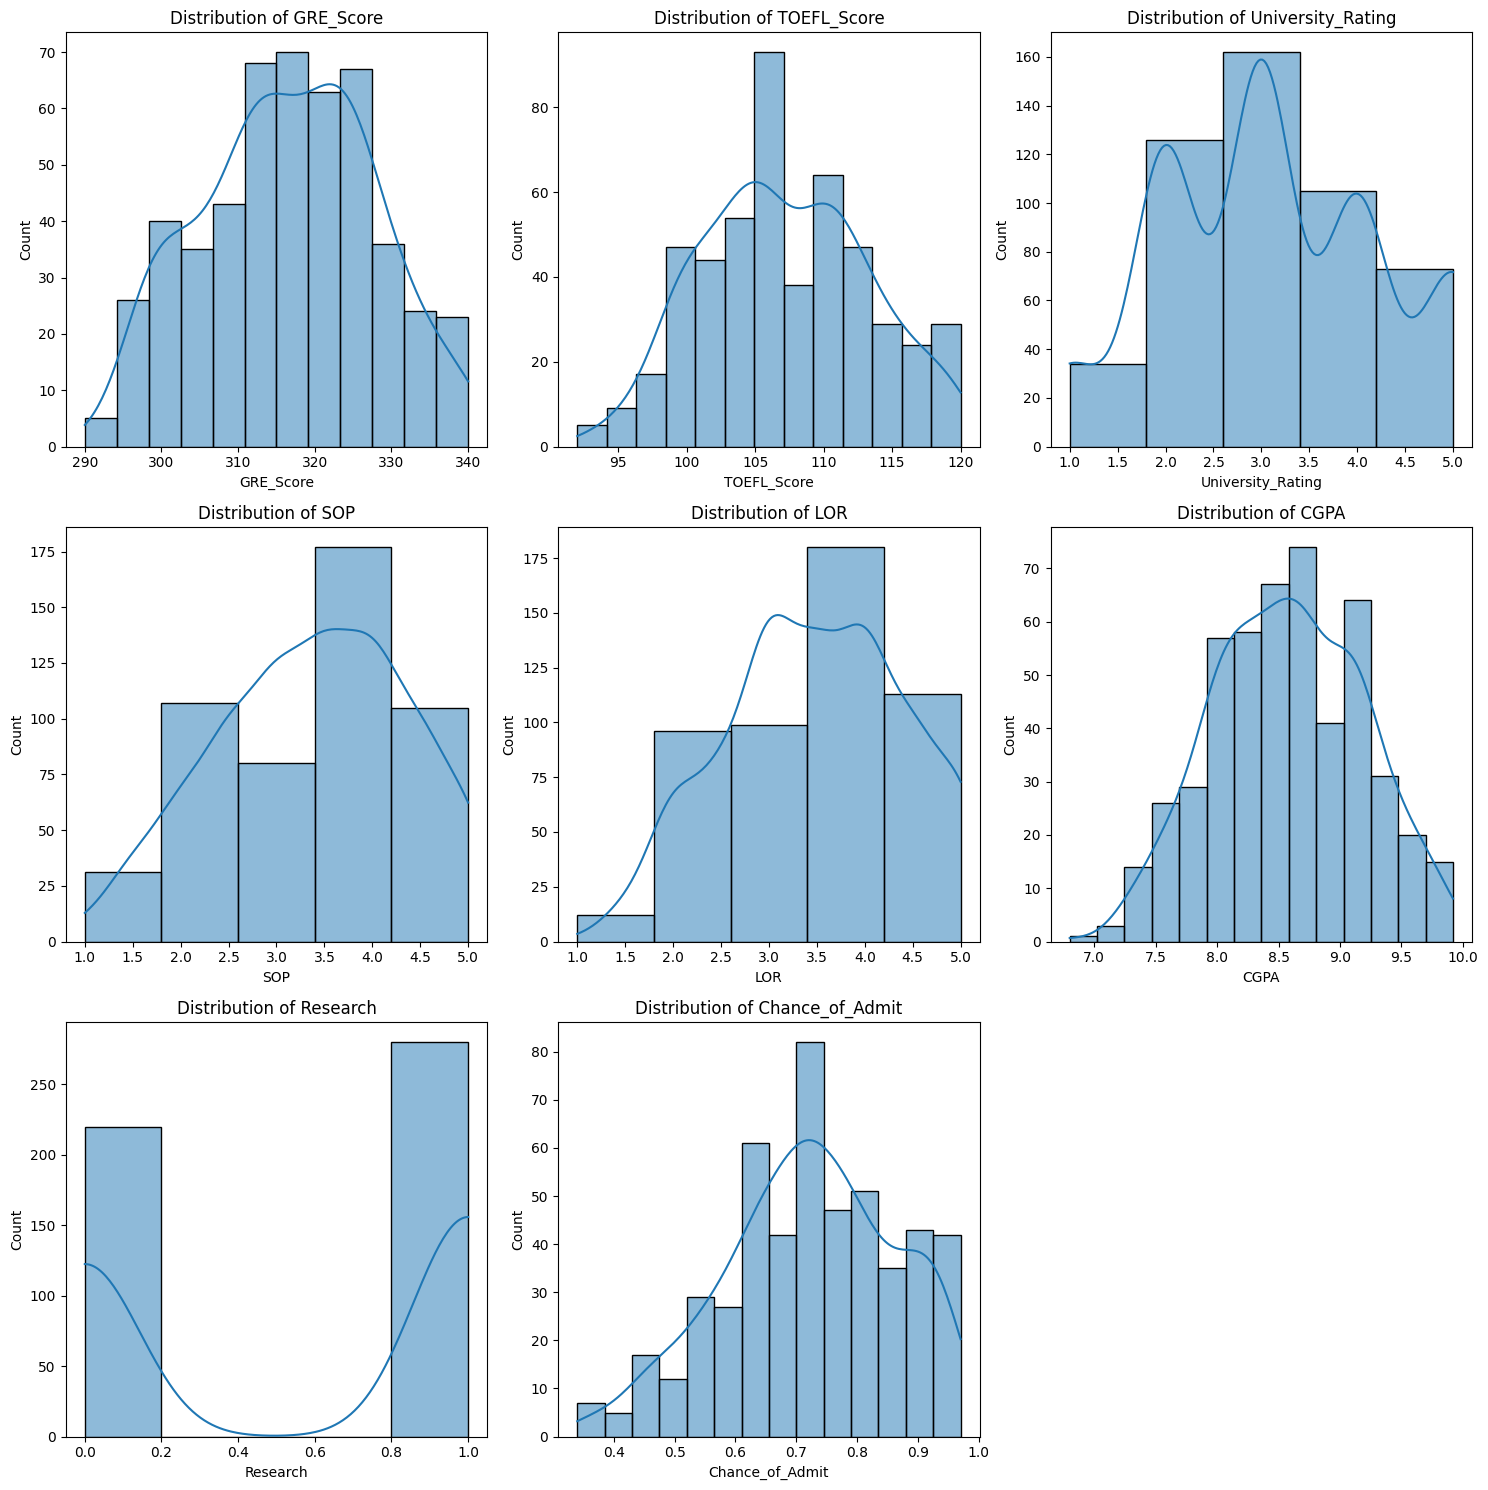

In [21]:
plt.figure(figsize=(15,15))
for i,col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    if df[col].nunique() < 10:
        sns.histplot(data=df, x=col, kde=True, bins=5)
    else:
        sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**📊 Interpretation of Feature Distributions**

- **GRE_Score & TOEFL_Score:** Both approximately follow a normal distribution, with a slight skew towards **higher scores**, which aligns with the profile of applicants targeting top universities.

- **University_Rating:** Shows a somewhat **bimodal distribution**, with peaks around ratings **2–3** and **4**, suggesting applicants mainly target mid-to-high-rated universities.

- **SOP & LOR:** These features are skewed towards **higher ratings** (SOP mostly between 3.0–4.0, LOR between 3.5–4.5), indicating that most applicants submit strong Statements of Purpose and Letters of Recommendation.

- **CGPA:** Exhibits a **left-skewed distribution**, with a majority of students having **higher CGPAs**, typical of competitive graduate applicants.

- **Research:** As a binary feature, it shows more applicants with **research experience (1)** than without (0).

- **Chance_of_Admit:** The target variable is skewed towards **higher admission probabilities**, reflecting the dataset’s focus on applicants likely to get admitted to top universities.


### 📉 Feature Relationships with Chance of Admit (Scatter Plots)

Scatter plots were created to visualize the relationships between individual features and the target variable, `Chance_of_Admit`.


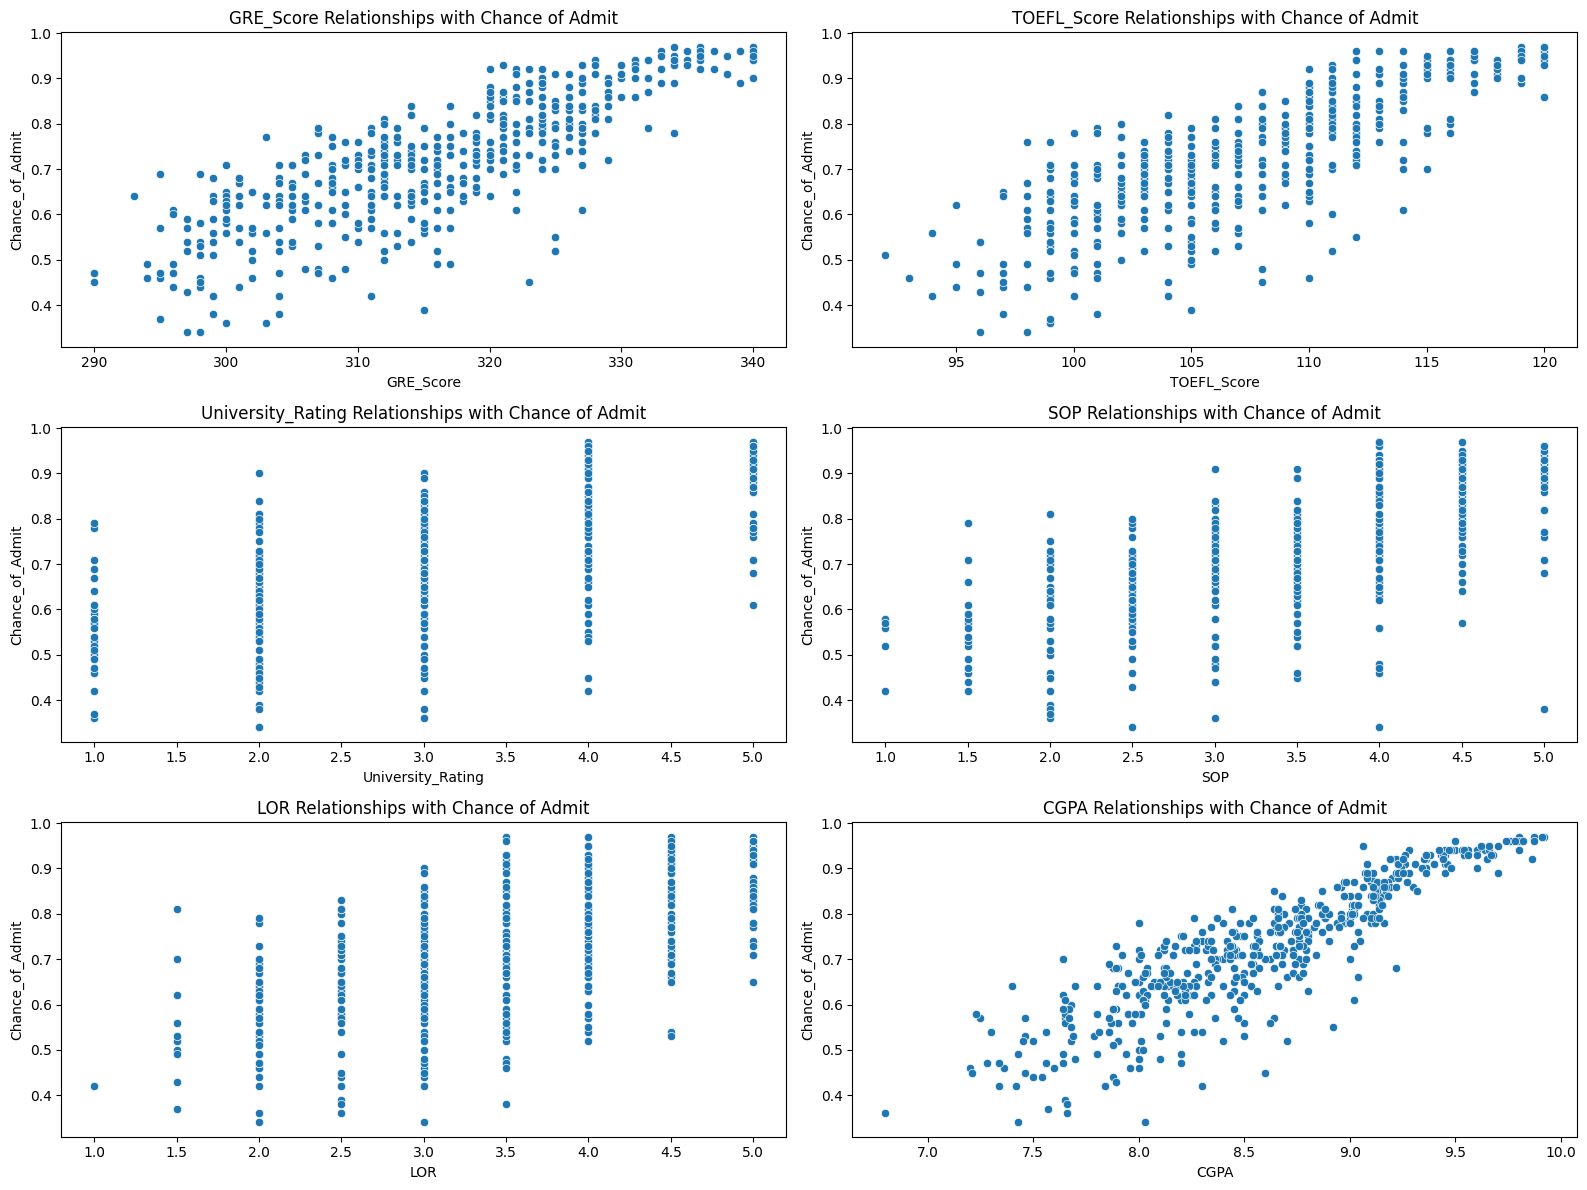

In [22]:
plt.figure(figsize=(16,12))
for i,col in enumerate(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA']):
    plt.subplot(3,2,i+1)
    sns.scatterplot(data=df, x=col, y='Chance_of_Admit')
    plt.title(f"{col} Relationships with Chance of Admit")
plt.tight_layout()
plt.show()

**📈 Insights from Scatter Plots: Feature Relationships with Chance_of_Admit**

- **GRE_Score, TOEFL_Score, and CGPA** exhibit **positive linear relationships** with the Chance_of_Admit.  
  - Higher scores in these features generally correspond to a higher probability of admission.

- **University_Rating, SOP, and LOR** also show **positive correlations** with admission chances.  
  - Due to their **ordinal** nature, these relationships appear more **stepped** rather than perfectly linear.  
  - Higher ratings or scores tend to be associated with increased chances of admission.

These observations reinforce the intuition that better academic performance and stronger application profiles increase the likelihood of acceptance.


### 📦 Impact of Research Experience on Chance_of_Admit (Box Plot)

A box plot was generated to compare the distribution of `Chance_of_Admit` between applicants **with** and **without** research experience.


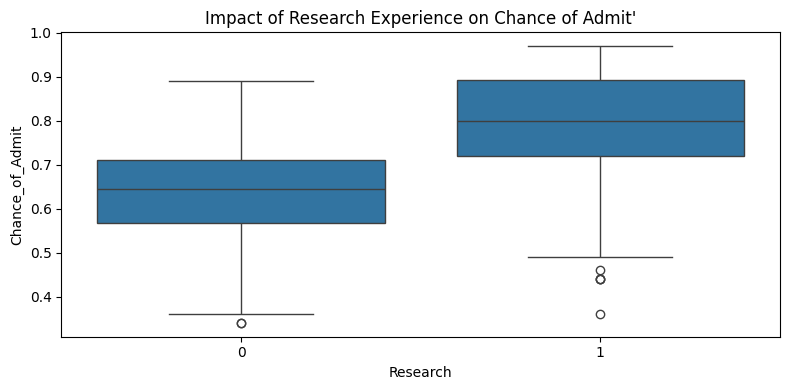

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Research', y='Chance_of_Admit')
plt.title(f"Impact of Research Experience on Chance of Admit'")
plt.tight_layout()
plt.show()

**📊 Interpretation of Research Experience Impact on Admission Chances**

The box plot reveals that applicants with research experience (`Research = 1`):

- Have a **significantly higher median** `Chance_of_Admit` compared to those without research experience (`Research = 0`).
- Exhibit a generally **higher interquartile range**, indicating a concentration of applicants with better admission probabilities.

This suggests that research experience is a valuable factor positively influencing the likelihood of admission.


### 🎨 Feature Relationships with Chance_of_Admit, Differentiated by Research (Hue Scatter Plots)

To further investigate the impact of research experience on admission chances:

- Scatter plots of individual features against `Chance_of_Admit` were recreated using **Research** as a hue (color grouping).  
- This allows comparison of trends between applicants **with** and **without** research experience.  
- A **horizontal line** representing the **mean `Chance_of_Admit`** was added for reference to better visualize how individual data points and groups relate to the overall average.


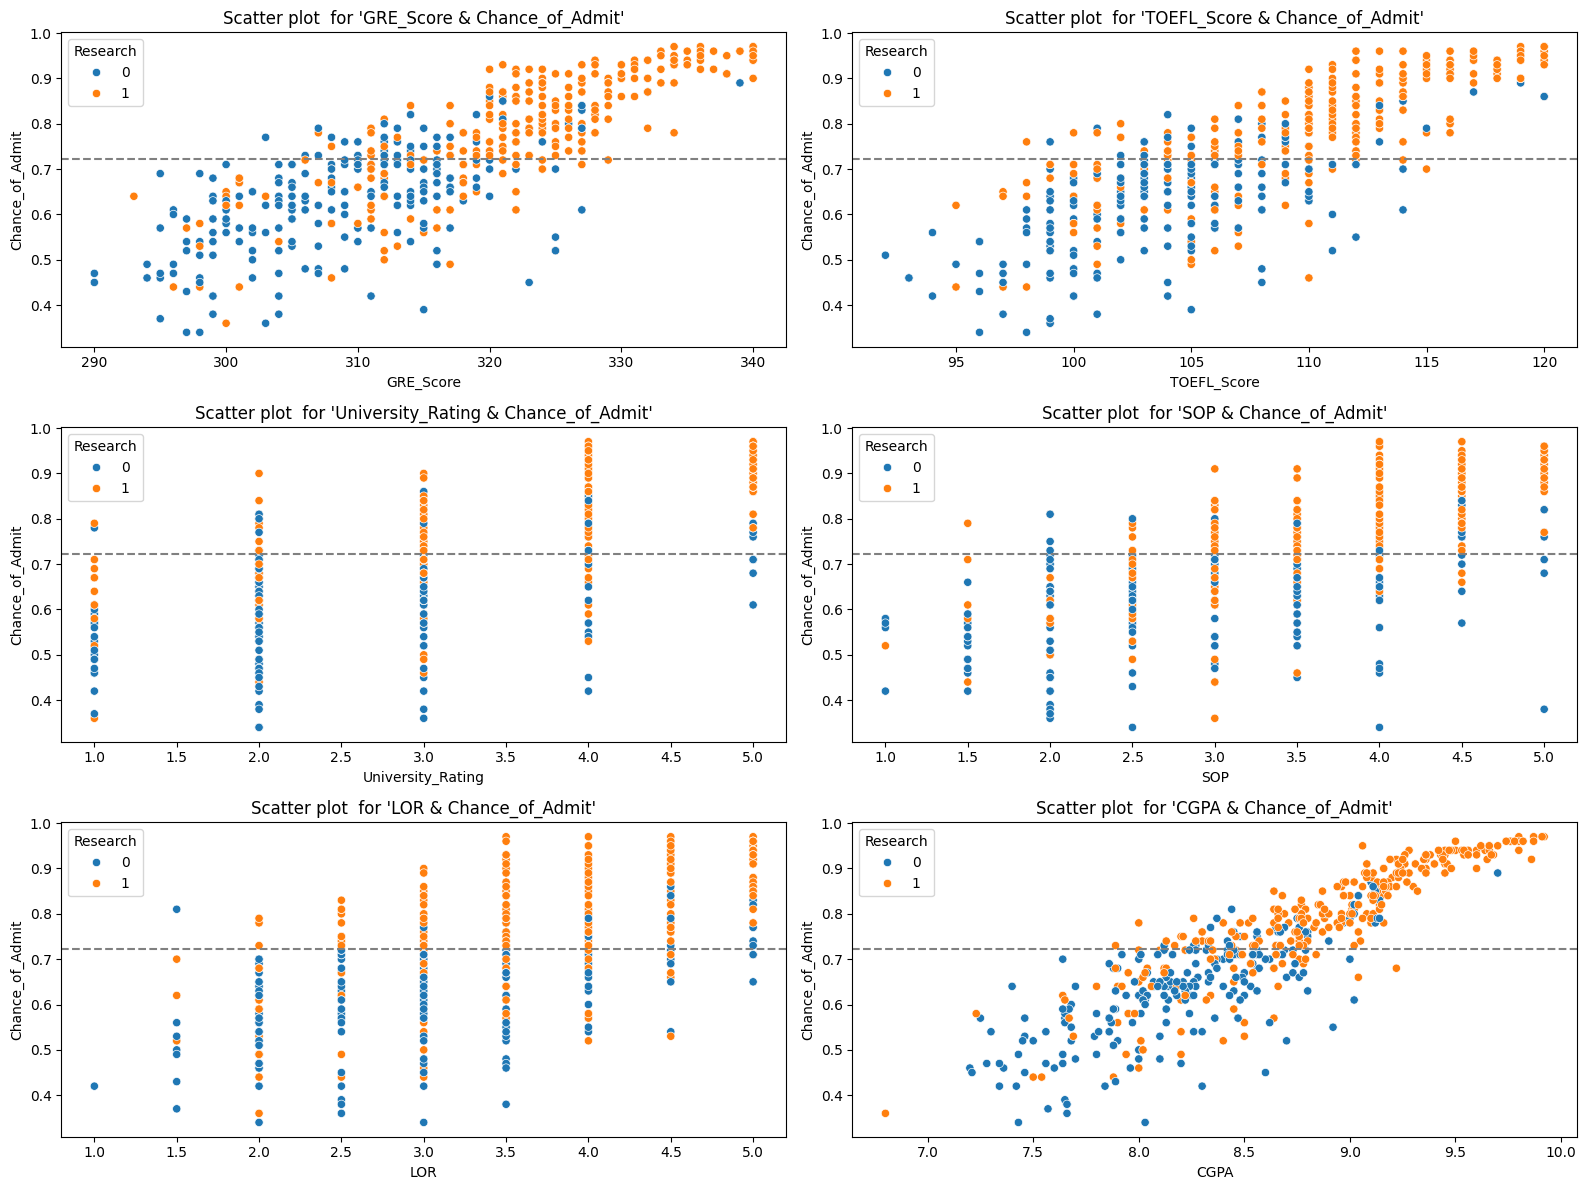

In [24]:
plt.figure(figsize=(16,12))
for i,col in enumerate(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA']):
    plt.subplot(3,2,i+1)
    sns.scatterplot(data=df, x=col, y='Chance_of_Admit', hue='Research')
    plt.axhline(y=df['Chance_of_Admit'].mean(), color='gray', linestyle='--')
    plt.title(f"Scatter plot  for '{col} & Chance_of_Admit'")
plt.tight_layout()
plt.show()

**📈 Interpretation of Research-Differentiated Scatter Plots**

These plots reinforce previous findings:

- For any given score or rating in **GRE_Score**, **TOEFL_Score**, **University_Rating**, **SOP**, **LOR**, and **CGPA**,  
  applicants **with research experience** (orange points) generally have a **higher `Chance_of_Admit`** than those **without** (blue points).

- This indicates that **research experience is a strong positive predictor** of admission probability, even when controlling for other academic merits.

- The horizontal line showing the **mean `Chance_of_Admit`** highlights how applicants with research tend to be **above the average**, whereas those without often fall **below** it.

Overall, research experience amplifies the positive effect of other features on admission chances.


### 🔗 Correlation Analysis (Heatmap)

A correlation matrix was computed to quantify the **linear relationships** between all features and the target variable, `Chance_of_Admit`.

- A **heatmap** visualization was generated to provide an intuitive overview of these correlations.
- This helps identify which features have the strongest positive or negative associations with admission chances.

In [25]:
corr = df.corr()
corr

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


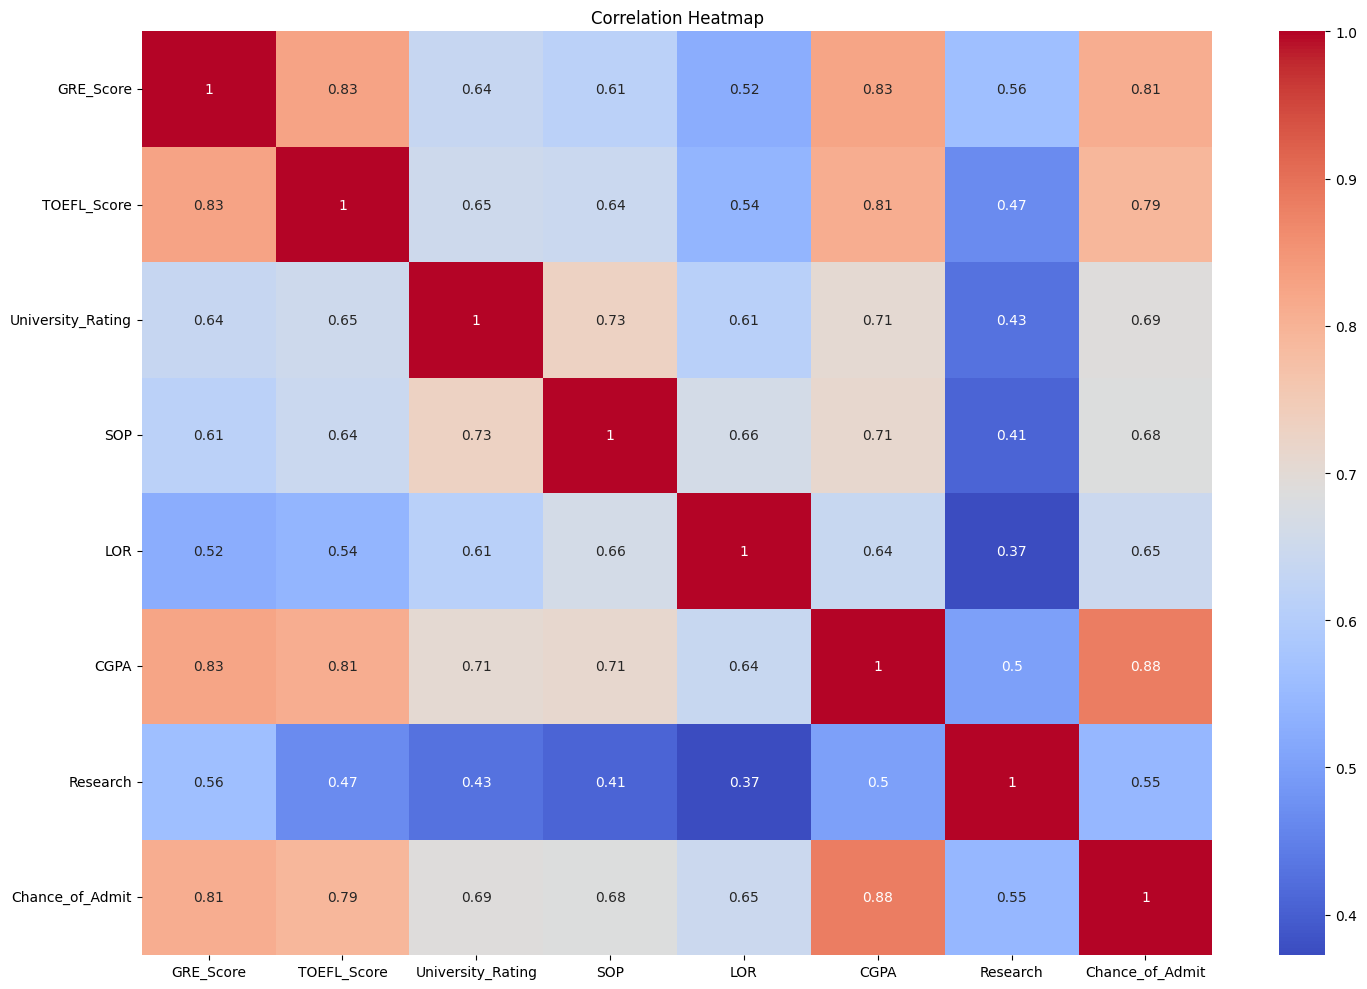

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**🔍 Insights from the Correlation Heatmap**

**Strong Positive Correlations with `Chance_of_Admit`:**

- **CGPA** has the strongest positive correlation with admission chances (**0.88**), highlighting undergraduate GPA as a key factor.
- **GRE_Score** (**0.81**) and **TOEFL_Score** (**0.79**) also demonstrate strong positive correlations, consistent with expectations.
- **University_Rating** (**0.69**), **SOP** (**0.68**), and **LOR** (**0.65**) show moderately strong positive correlations.
- **Research** exhibits a moderate positive correlation (**0.55**), reinforcing its importance observed in earlier analyses.

**Inter-feature Correlations:**

- **GRE_Score** and **TOEFL_Score** are highly correlated (**0.83**), which is logical given they assess similar academic abilities.
- **University_Rating**, **SOP**, and **LOR** have notable positive inter-correlations, indicating stronger applications tend to score consistently across these aspects.
- **CGPA** also correlates strongly with **GRE_Score** (**0.83**) and **TOEFL_Score** (**0.81**), showing that higher GPA students often perform well on standardized tests.

Overall, all features have positive correlations with `Chance_of_Admit`, providing a quantitative foundation for their collective influence on admission probability.


## 5. 📝 Insights from Exploratory Data Analysis (EDA)

Based on the comprehensive exploratory analysis, the following key insights have been identified:

- **Data Quality:**  
  The dataset is robust, with **no missing values** or **duplicate entries**, ensuring reliability for further analysis and modeling.

- **Applicant Profile Trends:**  
  Distributions of **GRE_Score**, **TOEFL_Score**, and **CGPA** indicate a generally **high-achieving applicant pool**, with scores skewed towards the higher end—consistent with applications to top universities.

- **Importance of Research Experience:**  
  Applicants with **research experience (Research = 1)** consistently show a **significantly higher Chance_of_Admit** compared to those without, highlighting research as a critical differentiator.

- **Strong Predictors of Admission:**  
  **CGPA** emerges as the strongest individual predictor, followed closely by **GRE_Score** and **TOEFL_Score**, emphasizing the importance of academic performance and standardized tests.

- **Holistic Application Factors:**  
  **University_Rating**, **SOP**, and **LOR** also play substantial roles, showing moderate to strong positive correlations with admission chances. A well-rounded application with strong recommendations and a compelling SOP is crucial.


## 6. 🛠️ Model Selection and Training

### ⚙️ Model Selection

- **Linear Regression** was chosen as the initial predictive model due to its:
  - **Interpretability**: Coefficients clearly indicate feature influence.
  - **Deployability**: Simplicity makes it easy to implement and maintain in production.

In [27]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### 🚦 Model Training & Evaluation

In [28]:
#For implementing the linear regression algo it is recomended to divide the data into X(dependent) and y(target)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape, y.shape

((500, 7), (500,))

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

#### 🔀 Data Splitting

- The dataset was separated into:
  - **Features (`X`)**: All predictor variables.
  - **Target (`y`)**: `Chance_of_Admit`.

- The data was then split into **training** and **testing** sets to assess model performance on unseen data.  
- Parameters used for splitting:
  - `test_size=0.2` (20% of data reserved for testing)
  - `random_state=42` (for reproducibility)
  - `shuffle=True` (to randomize data before splitting)

This approach ensures a fair evaluation of how well the model generalizes.


#### ⚖️ Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- **StandardScaler** was applied to both the training and testing feature sets to normalize the feature values.

- Scaling is important in Linear Regression to prevent features with larger numerical ranges from disproportionately influencing the model.

- The scaler was **fitted only on the training data** to avoid **data leakage** from the test set, ensuring a fair evaluation.


#### 🏋️ Model Training

- A **Linear Regression** model was instantiated using **scikit-learn**.  
- The model was trained on the **scaled training data** to learn the relationship between features and the target variable (`Chance_of_Admit`).


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

#### 📊 Training Performance

- The trained Linear Regression model’s performance on the **training set** was evaluated using the `score` method.


In [32]:
model.score(X_train,y_train)

0.8210671369321554

The model achieved an **R-squared value of approximately 0.821** on the training set.

- This means that about **82.1% of the variance** in the `Chance_of_Admit` is explained by the features in the training data.
- Such a high R² value suggests that the model fits the training data well and captures the key relationships effectively.


#### 📉 Model Coefficients Interpretation

- The **coefficients** of the trained Linear Regression model indicate the **individual impact** of each feature on the predicted `Chance_of_Admit`.
- Since features were scaled, coefficients reflect the impact based on standardized feature values, allowing direct comparison of feature importance.


In [33]:
for col, value in zip(X.columns, model.coef_):
    print(f"{col}:{value}")

GRE_Score:0.026670519110986897
TOEFL_Score:0.018226331980514196
University_Rating:0.0029399480555741472
SOP:0.0017880030977854913
LOR:0.015865501541734252
CGPA:0.06758105743297241
Research:0.011940491590050582


**🔍 Interpretation of Model Coefficients**

- **CGPA (0.0676):**  
  The largest positive coefficient, indicating that increases in CGPA have the most significant positive impact on the predicted `Chance_of_Admit`.

- **GRE_Score (0.0267) & TOEFL_Score (0.0182):**  
  Both features show substantial positive coefficients, reinforcing their importance as predictors.

- **LOR (0.0159):**  
  A positive coefficient, suggesting that stronger Letters of Recommendation contribute positively to admission chances.

- **Research (0.0119):**  
  This positive coefficient highlights the beneficial influence of research experience.

- **University_Rating (0.0029) & SOP (0.0018):**  
  These features have very small positive coefficients. While still positively associated with admission chances, their individual impact is minimal when controlling for other features in the model.


#### 📊 Visualizing Feature Importance

A bar plot was created to visualize the **magnitude** and **direction** (positive or negative) of each feature’s coefficient.


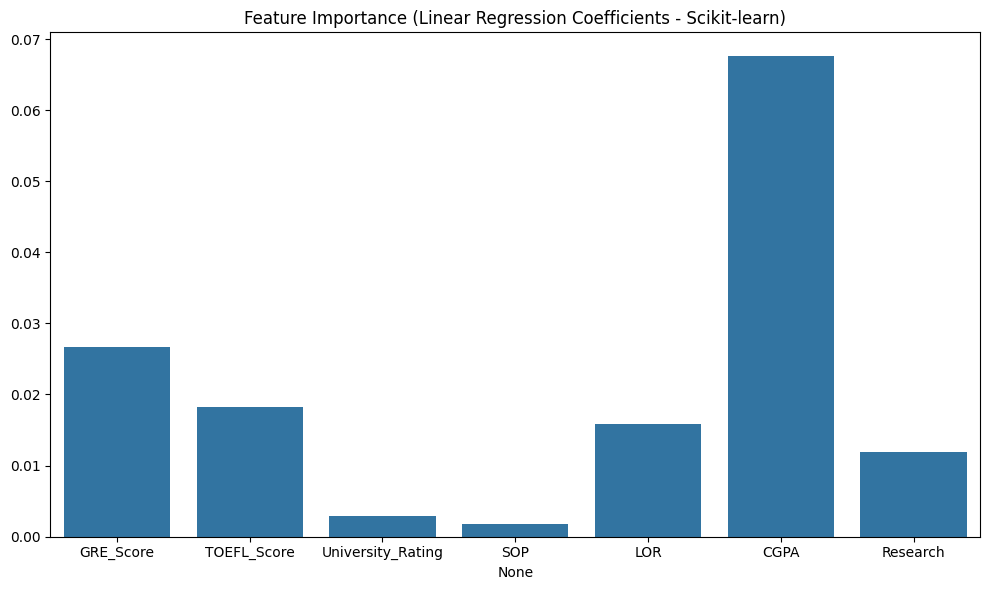

In [34]:
#Graph to visualize the column strehgth
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns, y=model.coef_)
plt.title("Feature Importance (Linear Regression Coefficients - Scikit-learn)")
plt.tight_layout()
plt.show()

**📈 Interpretation of the Coefficients Bar Plot**

The bar plot visually confirms the coefficient analysis:

- **CGPA** stands out with the **largest positive coefficient**, highlighting its strong influence on the predicted `Chance_of_Admit`.
- **GRE_Score** and **TOEFL_Score** also demonstrate significant positive impacts.
- The coefficients for **University_Rating** and **SOP** are very small positive values, indicating a minimal but positive contribution in this model.


### 🧮 Model Training Using Statsmodels (OLS)

To gain a more detailed statistical summary of the linear regression model:

- An **Ordinary Least Squares (OLS)** model was trained using the **statsmodels** library.
- A constant term (intercept) was explicitly added to the training features to represent the regression intercept.
- This approach provides comprehensive statistics such as coefficient estimates, standard errors, p-values, and confidence intervals, enabling deeper model interpretation.


In [35]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train,X_train).fit()
print(model_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:        Chance_of_Admit   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              1.721
Date:                Sat, 28 Jun 2025   Prob (F-statistic):                       0.103
Time:                        19:29:52   Log-Likelihood:                         -439.83
No. Observations:                 400   AIC:                                      893.7
Df Residuals:                     393   BIC:                                      921.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 📊 Model Coefficients from Statsmodels OLS

- The coefficient estimates from the **statsmodels OLS** model are consistent with those obtained from the scikit-learn Linear Regression model.
- However, statsmodels provides **additional statistical context**, including:
  - Standard errors  
  - t-statistics  
  - p-values  
  - Confidence intervals

These metrics help evaluate the **statistical significance** and reliability of each feature’s impact on the target variable.


In [36]:
for col, value in zip(X.columns, model_sm.params.values):
    print(f"{col}:{value}")

GRE_Score:0.026670519110979885
TOEFL_Score:0.018226331980519456
University_Rating:0.0029399480555746278
SOP:0.0017880030977851444
LOR:0.015865501541734175
CGPA:0.06758105743297327
Research:0.011940491590051654


#### 📊 Visualizing Feature Importance from Statsmodels Coefficients

A bar plot was created to visually display the **magnitude** and **direction** of each feature's coefficient based on the statsmodels OLS results.

- This visualization offers an intuitive overview of each predictor’s impact on the target variable.
- Comparing these coefficients with those from scikit-learn reinforces the consistency of the model’s findings.


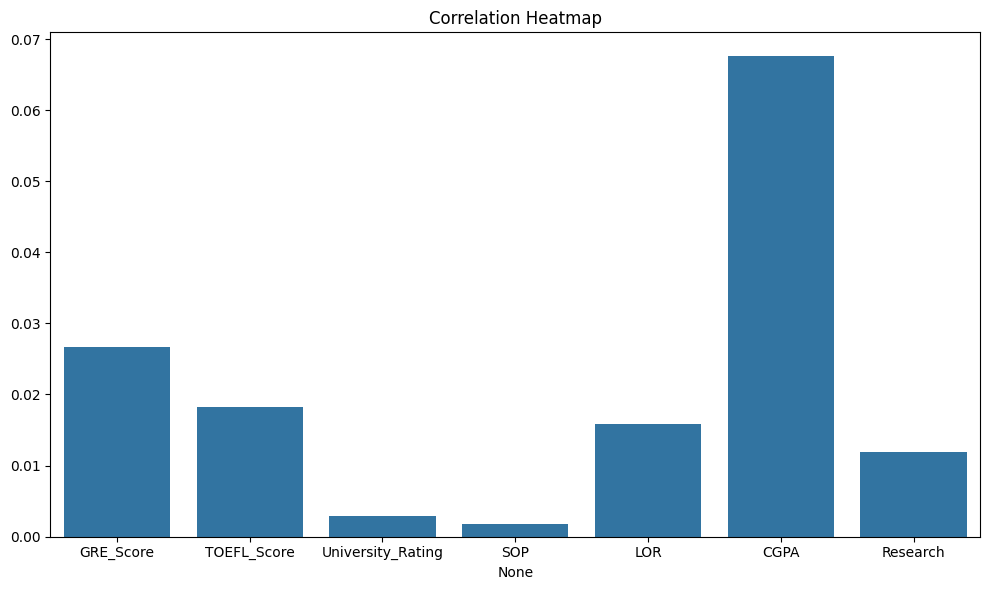

In [37]:
#Graph to visualize the column strehgth
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns, y=model_sm.params.values)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**📈 Interpretation of Statsmodels Coefficients Bar Plot**

This bar plot visually represents the coefficients obtained from the statsmodels OLS model:

- **CGPA** again shows the **highest positive impact** on the predicted `Chance_of_Admit`.
- **SOP** and **University_Rating** have very small positive coefficients, indicating minimal but positive contributions.
- The magnitude and direction of coefficients are consistent with the scikit-learn results, reflecting the effect of the current random state on model training.


### Assumptions of Linear Regression


#### 🧹 Residual Analysis (Residual Plot)

A residual plot was generated to visually assess the following key assumptions of linear regression:

- **Linearity:** Residuals should be randomly scattered around zero without systematic patterns, indicating a linear relationship between features and target.
- **Independence:** Residuals should be independent, showing no clear autocorrelation or clustering.
- **Homoscedasticity:** The variance of residuals should be constant across all levels of the predicted values, indicating equal spread.

This diagnostic plot helps verify whether the linear regression model is appropriate and highlights potential issues such as non-linearity or heteroscedasticity.


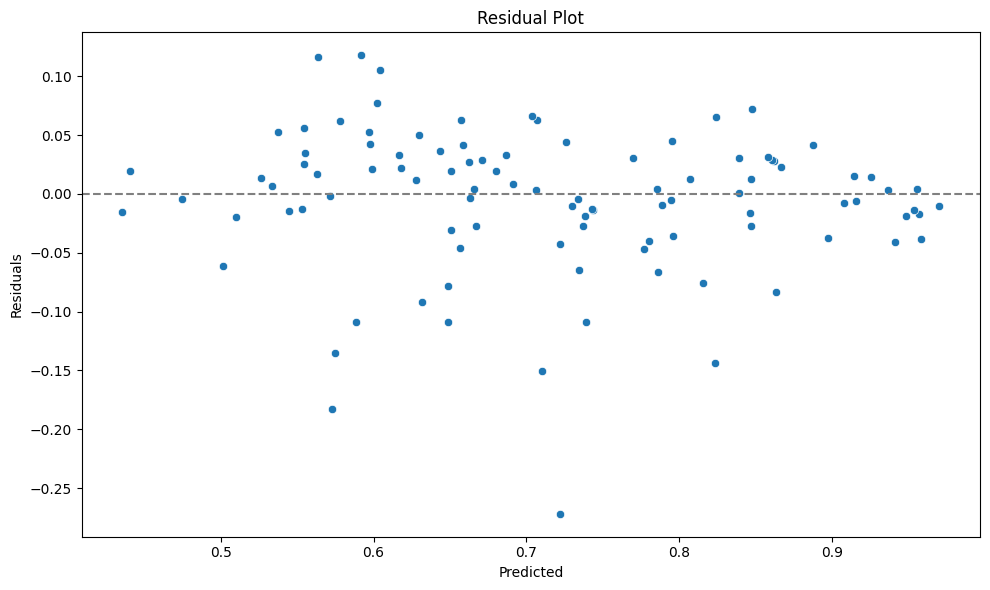

In [38]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.scatterplot(y=residuals, x=y_pred)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

**🔍 Residual Plot Observations**

- The residuals are scattered randomly around zero, indicating a good fit with no obvious patterns.
- The spread of residuals appears consistent across predicted values, suggesting **homoscedasticity** (constant variance).
- The randomness and uniformity in the residuals support the assumptions of **linearity** and **independence**, confirming the suitability of the linear regression model for this data.


#### ⚖️ Heteroskedasticity Test: Goldfeld-Quandt Test

- The **Goldfeld-Quandt test** was conducted to statistically assess the presence of **heteroskedasticity** (non-constant variance) in the residuals of the linear regression model.


In [39]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

gq_test = het_goldfeldquandt(y_train, X_train_sm)

f_statistic, p_value, _ = gq_test

print(f"F-statistic: {np.round(f_statistic,2)}")
print()
print(f"P-value: {np.round(p_value,2)}")
print()

if p_value < 0.05:
    print("❌ Heteroskedasticity detected (reject H0).")
else:
    print("✅ No evidence of heteroskedasticity (fail to reject H0).")

F-statistic: 0.95

P-value: 0.64

✅ No evidence of heteroskedasticity (fail to reject H0).


**📈 Goldfeld-Quandt Test Results**

- The Goldfeld-Quandt test returned a **p-value of 0.64**, which is greater than the standard significance level of 0.05.
- This means we **fail to reject the null hypothesis of homoscedasticity**, indicating no statistical evidence of heteroskedasticity in the residuals.
- This finding supports the residual plot observations and suggests that the assumption of **constant variance of errors** holds for this model.


#### 📉 Residual Distribution (Histogram with KDE)

- A histogram combined with a **Kernel Density Estimate (KDE)** was generated to visualize the distribution of residuals.
- Ideally, residuals should be **normally distributed around zero**, indicating that errors are random and symmetrically spread.


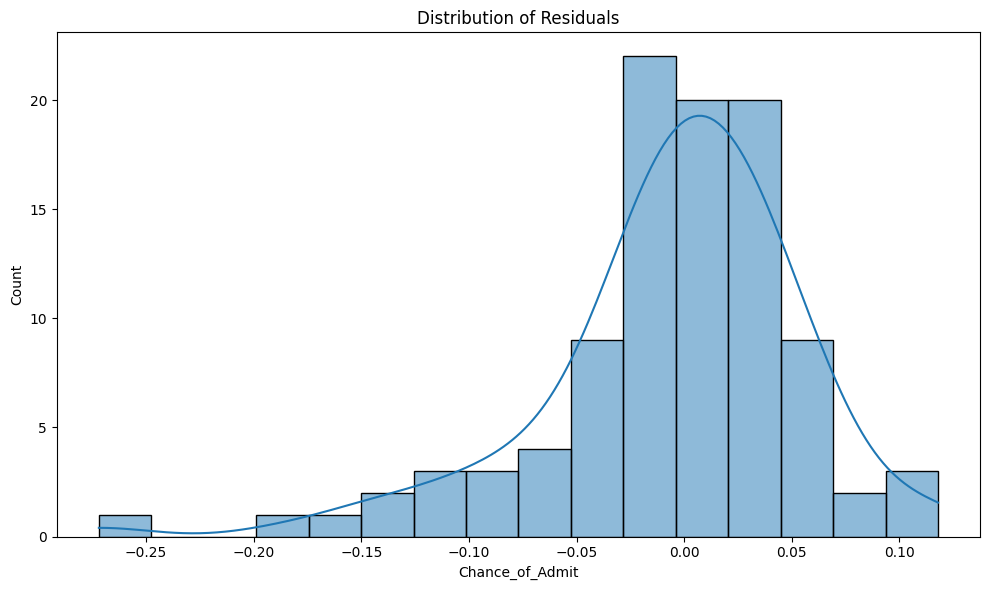

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(x=residuals, kde=True)
plt.title(f"Distribution of Residuals")
plt.tight_layout()
plt.show()

**🔍 Residual Distribution Interpretation**

- The histogram of residuals displays a **somewhat bell-shaped distribution centered around zero**, indicating a reasonable approximation of normality.
- Some deviations are observed, particularly in the tails, which suggests the residuals may not be perfectly normally distributed.
- Overall, the distribution is close enough to normal to support the assumptions required for reliable inference in the linear regression model.


#### 📐 Quantile-Quantile (QQ) Plot for Residual Normality

- A **QQ plot** was generated to formally assess the **normality of the residuals**.
- In this plot, if the residuals are **normally distributed**, the points will lie close to the **straight diagonal line**.
- Deviations from this line indicate departures from normality, which can affect the validity of inference in linear regression.

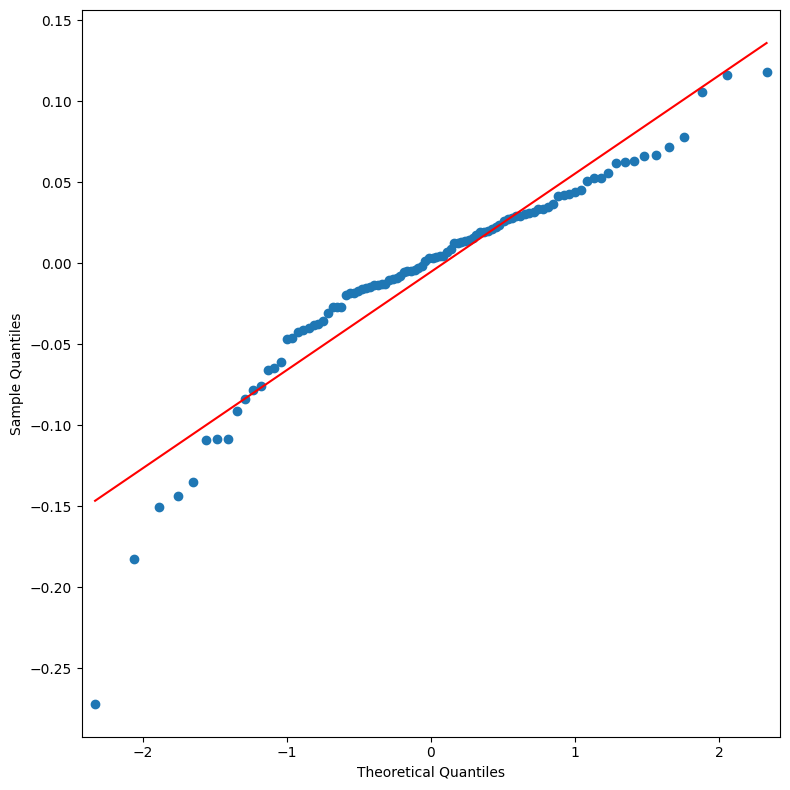

In [41]:
fig = plt.figure(figsize=(8,8))  # Width=10, Height=6 inches

# Add QQ plot to the figure, line='s' adds standardized fit line
ax = fig.add_subplot(1,1,1)
sm.qqplot(residuals, line='s', ax=ax)
plt.tight_layout()
plt.show()

**🔎 QQ Plot Interpretation**

- The QQ plot shows that most data points lie reasonably close to the red diagonal line, particularly in the central range.
- This suggests the residuals are **approximately normally distributed** in the bulk of the data.
- However, deviations at the tails indicate that the extreme residual values diverge from normality, pointing to some **non-normality in the tails**.
- These findings align with the residual histogram observations, confirming slight departures from perfect normality mostly in the extremes.


#### ⚠️ Multicollinearity Check: Variance Inflation Factor (VIF)

- The **Variance Inflation Factor (VIF)** was calculated for each independent variable to assess **multicollinearity**—the degree to which predictor variables are linearly related.
- High multicollinearity can inflate the variance of coefficient estimates, making them unstable and less reliable.
- A common rule of thumb:
  - **VIF > 5** (or sometimes > 10) indicates **potentially problematic multicollinearity**.
- Assessing VIF helps decide whether to remove or combine correlated features to improve model stability.


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["feature"] = X.columns
print(vif)

        VIF            feature
0  4.489983          GRE_Score
1  3.664298        TOEFL_Score
2  2.572110  University_Rating
3  2.785764                SOP
4  1.977698                LOR
5  4.654540               CGPA
6  1.518065           Research


**📊 Variance Inflation Factor (VIF) Results**

- All VIF values are **below 5**, indicating that **multicollinearity is not a significant concern** in this model.
- Although **GRE_Score** and **CGPA** have the highest VIFs (around 4.5), these values remain within acceptable limits.
- This suggests that the predictor variables are not excessively correlated, ensuring stable and interpretable regression coefficients.


**📊 Visualizing Multicollinearity: VIF Bar Plot**

- A bar plot was created to visualize the **Variance Inflation Factor (VIF)** values for each feature.
- This visualization helps quickly identify features with relatively higher multicollinearity.


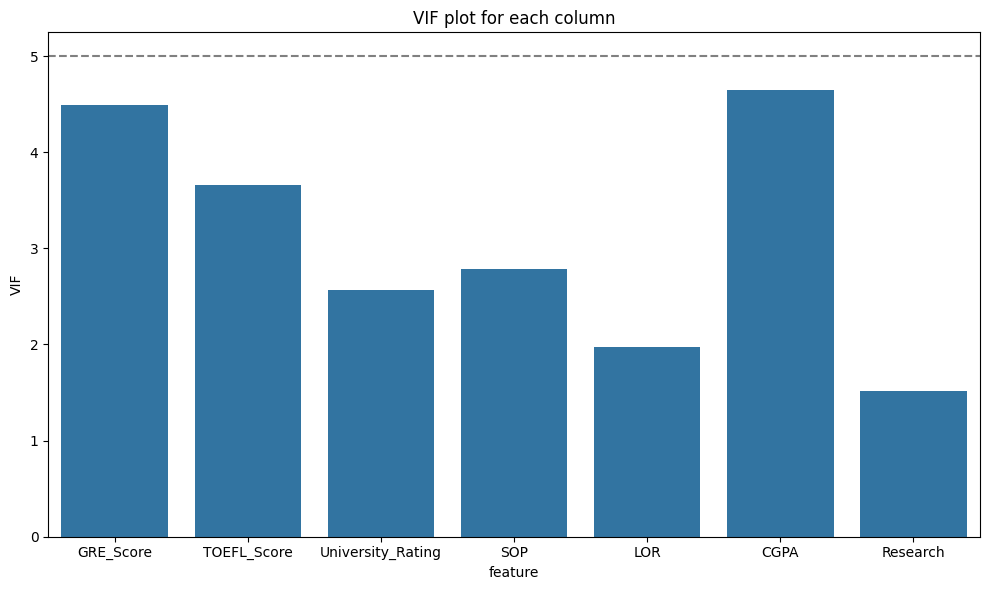

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=vif, x='feature', y='VIF')
plt.axhline(y=5, color='gray', linestyle='--')
plt.title(f"VIF plot for each column")
plt.tight_layout()
plt.show()

**📈 Interpretation of VIF Bar Plot**

- The VIF bar plot visually confirms that **all features have VIF values below the common threshold of 5**.


## 7. Results

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)
m,d = X_train.shape
r2 = r2_score(y_test,y_pred)
a_r2 = 1 - (1 - r2) * (m - 1) / (m - d - 1)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Adjusted-R2 Score: {a_r2}")

R2 Score: 0.8188432567829628
Mean Squared Error: 0.003704655398788412
Mean Absolute Error: 0.04272265427705368
Adjusted-R2 Score: 0.8156083149398013


In [45]:
import joblib

# Save model and scaler
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### 🔑 Key Findings

#### Model Performance (R-squared)
- The Linear Regression model achieved:
  - **Training R-squared:** ~0.821  
  - **Test R-squared:** ~0.819  
  - **Adjusted R-squared (Test):** 0.816  
- This indicates the model explains about **81.9% of the variance** in `Chance_of_Admit` on unseen data, demonstrating strong predictive capability.

#### Error Metrics
- **Mean Squared Error (MSE):** 0.0037  
  - Indicates a very small average squared difference between predicted and actual values.
- **Mean Absolute Error (MAE):** 0.0427  
  - On average, predictions deviate by about **4.27 percentage points**, which is reasonably low for this task.

#### Feature Importance (Coefficients)
- **CGPA (0.0676):**  
  - The most influential predictor, highlighting the significance of undergraduate academic performance.
- **GRE_Score (0.0267)** and **TOEFL_Score (0.0182):**  
  - Strong positive impacts, reinforcing the importance of standardized test scores.
- **LOR (0.0159)** and **Research (0.0119):**  
  - Positively contribute to admission chances.
- **University_Rating (0.0029)** and **SOP (0.0018):**  
  - Very small positive coefficients, suggesting minimal individual impact when considering other features.

#### Model Assumptions Check
- **Homoscedasticity:**  
  - Goldfeld-Quandt test p-value = 0.64 and residual plots indicate **no evidence of heteroskedasticity**, supporting reliable standard errors.
- **Normality of Residuals:**  
  - Histogram and QQ plot show residuals are approximately normally distributed, with slight deviations in the tails. This is generally acceptable for linear regression.
- **Multicollinearity:**  
  - All **VIF values are below 5** (max ~4.65 for CGPA), indicating **no significant multicollinearity** concerns.  
  - Ensures stable and interpretable coefficient estimates.

### 📊 Model Performance on Test Set
| Metric                   | Value   |
|--------------------------|---------|
| R² Score                 | 0.8188  |
| Mean Squared Error (MSE) | 0.0037  |
| Mean Absolute Error (MAE)| 0.0427  |
| Adjusted R² Score        | 0.8156  |













### 💡 Insights & Interpretations
- The model demonstrates **strong predictive power** for graduate admission chances, primarily driven by **CGPA, GRE, and TOEFL scores**.
- Other factors like **LOR** and **Research experience** also contribute positively but to a lesser degree.
- Key assumptions regarding **homoscedasticity** and **multicollinearity** are satisfied, enhancing confidence in the model.
- Slight deviations from normality in the residuals’ tails suggest there might be subtle non-linearities or unaccounted factors affecting extreme cases.
- The relatively low statistical significance of some individual coefficients (per statsmodels output) implies the need for cautious interpretation, especially given high correlations among predictors.

